# PN2V Training
Here we will use the estimated noise model (from the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```) and train a PN2V network on single noisy images.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
from unet.model import UNet
from pn2v import utils
from pn2v import gaussianMixtureNoiseModel
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
import os
import urllib
import zipfile
import torch
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

Load the data that needs to be denoised. It is expected that you have downloaded the datasets from  https://owncloud.mpi-cbg.de/index.php/s/Cvlx6TfqCPXl4r1/download and created a noise model (either GMM based or histogram based, using either the notebook ```1a_CreateNoiseModel_GMM.ipynb``` or ```1b_CreateNoiseModel_Histogram.ipynb```). Ensure that for Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif``` and not the slide edge data. For your dataset, ensure that you load the right data. 

In [2]:
path='../../../data/Mouse skull nuclei/'
# Load the training data
data=imread(path+'example2_digital_offset300.tif')
dataName='mouseskullnuclei'

Uncomment the pertinent `nameNoiseModel` to choose the noiseModel of interest

In [3]:
nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'calibration'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'calibration'
#nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'bootstrap'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'bootstrap'


In [4]:
namePN2VModel=nameNoiseModel
if('HistNoiseModel' in namePN2VModel):
    histogram = np.load(path+nameNoiseModel+'.npy') 
    noiseModel= histNoiseModel.NoiseModel(histogram, device=device)
elif('GMMNoiseModel' in namePN2VModel):
    params= np.load(path+nameNoiseModel+'.npz')
    noiseModel = gaussianMixtureNoiseModel.GaussianMixtureNoiseModel(params = params, device = device)
  

### Create the Network and Train it
This can take a while.

In [5]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()
np.random.shuffle(my_train_data)
np.random.shuffle(my_val_data)

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=namePN2VModel, directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 4.880681324005127+-(2SEM)0.08126774601513305      
Epoch 1 finished      
avg. loss: 4.421182322502136+-(2SEM)0.04815680458727691      
Epoch 2 finished      
avg. loss: 4.270306873321533+-(2SEM)0.0576192808493689      
Epoch 3 finished      
avg. loss: 4.129585814476013+-(2SEM)0.03789277583391803      
Epoch 4 finished      
avg. loss: 3.9695449829101563+-(2SEM)0.03478039710806178      
Epoch 5 finished      
avg. loss: 3.929347801208496+-(2SEM)0.03249052404666623      
Epoch 6 finished      
avg. loss: 3.86217360496521+-(2SEM)0.04267606041388912      
Epoch 7 finished      
avg. loss: 3.8165767669677733+-(2SEM)0.048202835589366604      
Epoch 8 finished      
avg. loss: 3.792721450328827+-(2SEM)0.035826335109739406      
Epoch 9 finished      
avg. loss: 3.7170904874801636+-(2SEM)0.04612638084362417      
Epoch 10 finished      
avg. loss: 3.714806151390076+-(2SEM)0.07465464037232752      
Epoch 11 finished      
avg. loss: 3.702977705001831+-(2SEM)0

avg. loss: 3.597465753555298+-(2SEM)0.06906189937776475      
Epoch 93 finished      
avg. loss: 3.5899824857711793+-(2SEM)0.0739246401132633      
Epoch 94 finished      
avg. loss: 3.5450127601623533+-(2SEM)0.06458749842631169      
Epoch 95 finished      
avg. loss: 3.5873283624649046+-(2SEM)0.06445105496969447      
Epoch    95: reducing learning rate of group 0 to 3.1250e-05.
Epoch 96 finished      
avg. loss: 3.615526819229126+-(2SEM)0.054545495540206275      
Epoch 97 finished      
avg. loss: 3.5964159250259398+-(2SEM)0.06292541184150663      
Epoch 98 finished      
avg. loss: 3.56746906042099+-(2SEM)0.06718679421944379      
Epoch 99 finished      
avg. loss: 3.541032302379608+-(2SEM)0.05641519952007507      
Epoch 100 finished      
avg. loss: 3.5765031456947325+-(2SEM)0.07772461857936462      
Epoch 101 finished      
avg. loss: 3.5465099930763246+-(2SEM)0.048836957500228435      
Epoch 102 finished      
avg. loss: 3.625054216384888+-(2SEM)0.08127191155698647      
Epoch 1

avg. loss: 3.5848186135292055+-(2SEM)0.07394705472142313      
Epoch 181 finished      
avg. loss: 3.5982863903045654+-(2SEM)0.058435732522972156      
Epoch 182 finished      
avg. loss: 3.547381138801575+-(2SEM)0.061571772886693646      
Epoch 183 finished      
avg. loss: 3.638956356048584+-(2SEM)0.06506626980571172      
Epoch 184 finished      
avg. loss: 3.5951987385749815+-(2SEM)0.06271570104845722      
Epoch 185 finished      
avg. loss: 3.5852858304977415+-(2SEM)0.05192413624828177      
Epoch 186 finished      
avg. loss: 3.567640006542206+-(2SEM)0.07268139277754394      
Epoch   186: reducing learning rate of group 0 to 1.2207e-07.
Epoch 187 finished      
avg. loss: 3.606983006000519+-(2SEM)0.07380766440679433      
Epoch 188 finished      
avg. loss: 3.5989862442016602+-(2SEM)0.07351442220547089      
Epoch 189 finished      
avg. loss: 3.5607807517051695+-(2SEM)0.0642559357745804      
Epoch 190 finished      
avg. loss: 3.6199224472045897+-(2SEM)0.06493501179816791     

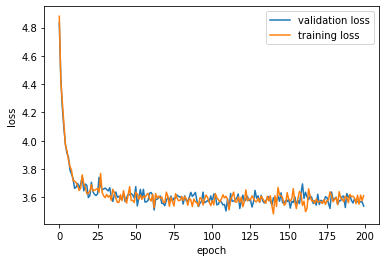

In [7]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()